# Predictive Model assn 4

Author: Xiaolan Li

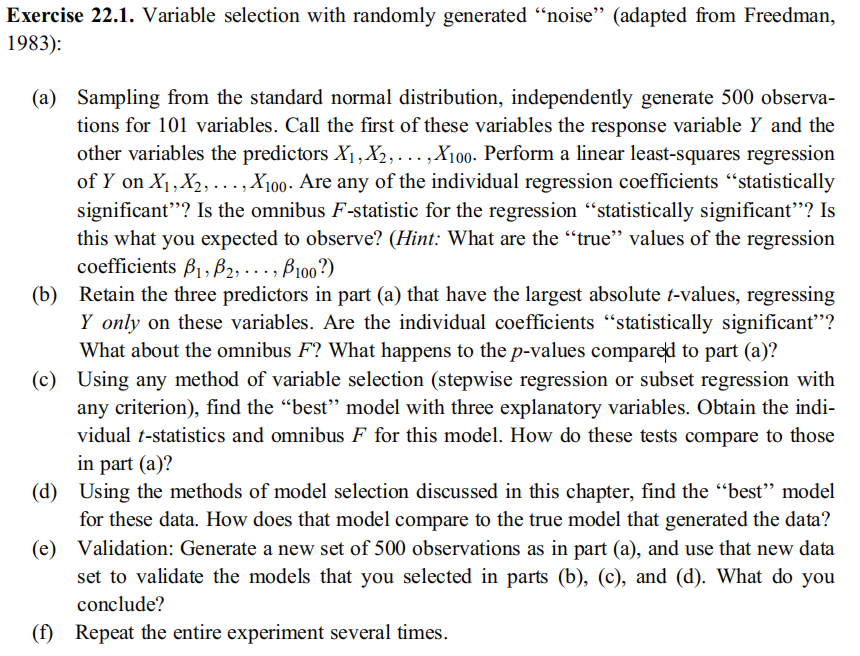

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

## Part a

In [2]:
# create an empty samples
samples = []
# mean and standard deviation
mu, sigma = 0, 1 
# generate samples
n_predictor = 100
n_observation = 500
# To make sure we generate same samples each time we run the script
np.random.seed(1)
for _ in range(n_predictor+1):
    samples.append(np.random.normal(mu, sigma, n_observation))

# transform to dataframe
df = pd.DataFrame(samples)
df = df.T
display(df)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.624345,-1.719394,-0.153236,1.301225,0.489517,1.083952,-0.077107,0.230641,-0.140371,-0.551358,...,-2.104917,-0.277467,1.133198,0.809533,-0.106861,-0.459128,1.056716,-0.381945,-1.478579,-0.893885
1,-0.611756,0.057121,-2.432509,-0.312392,0.238796,-0.013095,0.207825,-0.854581,0.141642,-0.604188,...,-0.844305,-1.215392,-0.597312,-1.718461,-0.042615,0.727825,-0.070153,0.372500,-1.131660,-0.371890
2,-0.528172,-0.799547,0.507984,-0.271229,-0.448112,-0.594676,0.986196,0.021500,0.311969,1.234969,...,0.823696,-0.901534,0.545004,-0.862136,0.020344,-0.627022,-0.816437,-0.866899,-0.243799,0.195330
3,-1.072969,-0.291595,-0.324032,1.862913,-0.610795,-1.251391,1.432756,-2.710394,0.769085,-0.103111,...,0.907700,0.236060,0.272042,-1.885658,-1.569312,-1.197025,-0.183290,-2.621852,0.166482,-1.256424
4,0.865408,-0.258983,-1.511077,-0.642874,-2.029945,-0.769384,0.528258,-1.066801,0.584286,-0.368854,...,0.503518,-0.438561,1.377900,-0.136971,-0.494248,1.089096,0.005853,-0.578885,-0.600384,-0.188097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.828628,-0.116444,0.196645,0.188583,-0.202909,-0.771890,-0.276141,-0.125903,0.747622,1.604546,...,-0.711534,0.367970,1.897683,-1.483159,-0.109516,-0.173351,-0.484624,-2.504288,-0.332847,-0.098258
496,0.528880,-2.277298,-0.632590,0.560918,0.159902,-0.622657,-1.597310,-0.960346,0.943634,0.566613,...,-0.638217,-0.717532,-0.731126,0.885775,-1.158277,-0.048523,-0.449876,-0.483462,-0.127801,1.487339
497,-2.237087,-0.069625,-0.209847,-0.921659,-0.222612,-0.150660,2.223821,-0.843913,-0.425562,-0.775988,...,0.439374,-1.491554,-2.663694,-0.466270,-0.486987,-0.859567,-0.414403,0.422850,-0.590982,1.169843
498,-1.107713,0.353870,1.897161,0.647375,0.689593,-1.400023,0.167006,0.628342,0.805778,1.084889,...,0.242588,0.322093,-2.807638,1.291815,-0.697030,0.733099,0.105814,0.743708,0.923541,0.872456


In [3]:
# calculate the individual regression coefficients
x = df.iloc[:, 1:]
y = df[0]
reg = LinearRegression().fit(x, y)
coefficients = reg.coef_
intercept = reg.intercept_
print(coefficients) # 100 coefficients for each predictors
print(intercept)

[-0.02304459  0.01120105  0.02673527  0.02540971  0.07594858  0.06838617
  0.0196577  -0.03577572  0.04644894  0.03286171 -0.05149234  0.01083843
  0.05495265  0.0164705  -0.0573595   0.07061936 -0.032041   -0.04182036
  0.01523972 -0.03767089  0.01785061  0.10958088  0.01400946 -0.02541058
  0.02231322 -0.10033101  0.04561383 -0.07296106  0.02197016 -0.01544176
 -0.04823695  0.0054938   0.05774864  0.05799126 -0.0139874  -0.05946721
  0.0802212  -0.02985664  0.07708794  0.02675455 -0.13917696 -0.05762602
 -0.06501424  0.03472011  0.04691383 -0.06081682 -0.01336819  0.01043799
 -0.03003932  0.04761008  0.06690794  0.00392793 -0.02360185 -0.01069912
  0.01246571  0.04582866  0.03948545 -0.02020161  0.06752603 -0.04687937
 -0.04522141 -0.00075588  0.07382659  0.00429328  0.00575776 -0.02094612
  0.0301967   0.04760584  0.05879969 -0.04269758 -0.03949127  0.04856382
 -0.05339487  0.08213544  0.09980075 -0.00407878 -0.07425948  0.02303375
  0.04614966 -0.02083936 -0.01966294  0.00995174 -0

In [4]:
# calculate t score see the coefficients are significantly different from zero
t_scores = coefficients/(np.std(x)/np.sqrt(n_observation))
print(t_scores)

1     -0.529415
2      0.245058
3      0.577323
4      0.569984
5      1.795838
         ...   
96     0.799287
97     0.131594
98    -0.700398
99    -1.342487
100   -0.428038
Length: 100, dtype: float64


In [5]:
#find p-value
p_values = scipy.stats.t.sf(np.abs(t_scores), df=n_observation)*2
print(p_values)

[0.59675237 0.80651185 0.563981   0.56894451 0.07312396 0.13599192
 0.65793687 0.44863769 0.28875376 0.46274363 0.24144079 0.80831319
 0.2057397  0.72312048 0.18172956 0.12650459 0.49657409 0.31565798
 0.72474392 0.39025237 0.68980404 0.01443908 0.76161207 0.58090929
 0.59678951 0.02435821 0.31831535 0.10612362 0.62772622 0.73269944
 0.2727342  0.89898752 0.19939817 0.22253809 0.75370462 0.16512155
 0.07277518 0.495667   0.0924091  0.57144212 0.00166779 0.2159618
 0.13446055 0.43431147 0.28751074 0.16307845 0.76264071 0.81697663
 0.50726225 0.26773126 0.12967573 0.93269306 0.58985224 0.80963354
 0.76792267 0.27934071 0.39142482 0.64905879 0.13867207 0.30269466
 0.32992404 0.98610084 0.08700449 0.92770236 0.89986676 0.64641231
 0.49586161 0.26443247 0.19725435 0.33083285 0.37753342 0.26932074
 0.2567483  0.05183794 0.0255784  0.92824082 0.10948768 0.58963415
 0.31476115 0.65518731 0.64783424 0.82725766 0.97532424 0.97063103
 0.3175501  0.07715204 0.06650602 0.029627   0.44349477 0.35563

In [6]:
# We use a significance level of α = 0.05 with confidence is 95%
alpha = 0.05
index = 0
predictor_index = []
for p in p_values:
    index+=1
    # if in the reject zone
    if p<alpha:
        predictor_index.append(index)
print(predictor_index)

[22, 26, 41, 75, 88, 92, 94]


From the above result, we can conclude that coefficients in predictor `22, 26, 41, 74, 75, 88, 92, 94` are rejected in the null hypothesis at 5% significant level. 

Thus these  individual regression coefficients are significant at 5% significance level.

In [7]:
# number of parameters
num_params = len(coefficients)+1

# Calculate F score
# null hypothesis: coefficients are all equal to 0
y_preds = reg.predict(x)
y_mean = y.mean()
RSS = sum((y-y_preds)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
r_square = RegSS/TSS
F_scores = (r_square/(num_params-1))/((1-r_square)/(n_observation-num_params))
p = 1-scipy.stats.f.cdf(F_scores, n_predictor, n_observation-n_predictor+1) #find p-value of F test statistic 
print(p, F_scores)

0.4517007517834809 1.0142751185871708


The F test statistic is 1.01 and the corresponding p-value is 0.45. Since this p-value is more than 0.05, we would accept the null hypothesis. That means the omnibus F-statistic for the regression is not statistically significant. Thus this is not what I expected to observe since we did the t test that there're several variables are individual significant.

## Part b

In [8]:
# Retain the three predictors that have the largest absolute t-values
largest_t_predictors = abs(t_scores).sort_values(ascending=False).index[:3]

x = df[largest_t_predictors]
y = df[0]
reg = LinearRegression().fit(x, y)
coefficients = reg.coef_
intercept = reg.intercept_
print(coefficients) # 3 coefficients for each predictors
print(intercept)

[-0.11760002  0.09769961 -0.09752995]
0.033520090268598854


In [9]:
# calculate t score see the coefficients are significantly different from zero
t_scores = coefficients/(np.std(x)/np.sqrt(n_observation))
print(t_scores)

41   -2.670922
22    2.188568
26   -2.195236
dtype: float64


In [10]:
#find p-value
p_values = scipy.stats.t.sf(np.abs(t_scores), df=n_observation)*2
print(p_values)

[0.00781083 0.02909013 0.02860553]


 We can see all three t score of predictors are less than 0.05, thus the individual coefficients statistically significant.

In [11]:
# number of parameters
num_params = len(coefficients)+1

# Calculate F score
# null hypothesis: coefficients are all equal to 0
y_preds = reg.predict(x)
y_mean = y.mean()
RSS = sum((y-y_preds)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
r_square = RegSS/TSS
F_scores = (r_square/(num_params-1))/((1-r_square)/(n_observation-num_params))
p = 1-scipy.stats.f.cdf(F_scores, n_predictor, n_observation-n_predictor+1) #find p-value of F test statistic 
print(p, F_scores)

1.1102230246251565e-16 5.593257037590118


The F test statistic is 5.61 and the corresponding p-value is 1.11e-16. Since this p-value is way less than 0.05, we would reject the null hypothesis. That means the omnibus F-statistic for the regression is statistically significant. The p value decrease a lot and almost equal to 0.

In [12]:
# save model predictor
predictor_b = largest_t_predictors

## Part c

In [13]:
def forward_modelSelection(x, y,threshold_in):
    initial_list = []
    best_pval_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(dtype='float64',index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            best_pval_list.append(best_pval) 
            changed=True
        if not changed:
            break
    return included, best_pval_list


x = df.iloc[:, 1:]
y = df[0]
stepwise_predictors, best_pval_list = forward_modelSelection(x, y, 0.05)
print(stepwise_predictors, best_pval_list)

[41, 63, 26, 22, 42] [0.009435984616879087, 0.01699332421927528, 0.03530370667589569, 0.035083544401806686, 0.03591813607984481]


In [14]:
# sorted the predictors and get the largest 3 ones
stepwise_largest_predictors = [predictors for _,predictors in sorted(zip(best_pval_list,stepwise_predictors))][:3]
print(stepwise_largest_predictors)

[41, 63, 22]


In [15]:
x = df[stepwise_largest_predictors]
y = df[0]
reg = LinearRegression().fit(x, y)
coefficients = reg.coef_
intercept = reg.intercept_
print(coefficients) # 3 coefficients for each predictors
print(intercept)

# calculate t score see the coefficients are significantly different from zero
t_scores = coefficients/(np.std(x)/np.sqrt(n_observation))
print(t_scores)

[-0.11319887  0.10395782  0.09197322]
0.03297485336805986
41   -2.570964
63    2.414648
22    2.060291
dtype: float64


In [16]:
#find p-value
p_values = scipy.stats.t.sf(np.abs(t_scores), df=n_observation)*2
print(p_values)

[0.0104297  0.01610841 0.03988754]


In [17]:
# number of parameters
num_params = len(coefficients)+1

# Calculate F score
# null hypothesis: coefficients are all equal to 0
y_preds = reg.predict(x)
y_mean = y.mean()
RSS = sum((y-y_preds)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
r_square = RegSS/TSS
F_scores = (r_square/(num_params-1))/((1-r_square)/(n_observation-num_params))
p = 1-scipy.stats.f.cdf(F_scores, n_predictor, n_observation-n_predictor+1) #find p-value of F test statistic 
print(p, F_scores)

1.1102230246251565e-16 5.69229399718896


The F test statistic is 5.715 and the corresponding p-value is 1.11e-16. Since this p-value is way less than 0.05, we would reject the null hypothesis. That means the omnibus F-statistic for the regression is statistically significant. The p value decrease a lot and almost equal to 0. This model result is very close to the part b and it's way better than the model in part a.

In [18]:
# save model predictor
predictor_c = stepwise_largest_predictors

## Part d

In [19]:
def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic

def bic_modelSelection(x0, y):
    initial_list = []
    # initial a infinitely large value to campare in the very first time
    lowest_bic_list = [float('inf')]
    included = list(initial_list)
    bic_list = []
    while True:
        changed=False
        
        excluded = list(set(x0.columns)-set(included))
        new_model = pd.Series(dtype='float64',index=excluded)
        for new_column in excluded:
            x = x0[included+[new_column]]
            reg = LinearRegression().fit(x, y)
            # number of parameters
            num_params = len(reg.coef_) + 1
            # predict the training set
            yhat = reg.predict(x)
            # calculate the error
            mse = mean_squared_error(y, yhat)
            # calculate bic for regression
            bic = calculate_bic(len(y), mse, num_params)
            new_model[new_column] = bic
        lowest_bic = new_model.min()
        if lowest_bic< lowest_bic_list[-1]:
            best_feature = new_model.idxmin()
            print("Add best_feature {:3} with lowest_bic {:3}".format(best_feature,lowest_bic))
            included.append(best_feature)
            lowest_bic_list.append(lowest_bic) 
            changed=True
        if not changed:
            break
    return included, lowest_bic_list[-1]

x = df.iloc[:, 1:]
y = df[0]
best_predictors, lowest_bic_list = bic_modelSelection(x, y)
print(best_predictors, lowest_bic_list)

Add best_feature  41 with lowest_bic -6.002470734186609
[41] -6.002470734186609


Campared to the model generated data, in this model, we can only get one feature of X41 that has the lowest bic. Other models performed worse result than this model. 

In [20]:
# save model predictor
predictor_d = best_predictors

## Part e 

In [21]:
# create an empty samples
samples = []
# mean and standard deviation
mu, sigma = 0, 1 
# generate samples
n_predictor = 100
n_observation = 500
# To make sure we generate same samples each time we run the script
np.random.seed(20)
for _ in range(n_predictor+1):
    samples.append(np.random.normal(mu, sigma, n_observation))

# transform to dataframe
df_new = pd.DataFrame(samples)
df_new = df_new.T
display(df_new)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.883893,1.156503,0.141602,1.229428,1.222901,0.061484,0.027021,-0.623606,1.077870,-0.049502,...,0.603744,0.358325,-0.478956,0.105412,-0.858693,0.466705,1.798346,0.210043,1.044741,1.810061
1,0.195865,0.739956,-0.549947,-0.727886,-0.496309,-2.216377,-0.518603,-0.030405,1.296689,-1.099438,...,0.215403,0.974096,-0.285595,1.023221,1.344682,-1.024053,2.316632,1.468287,0.641665,-0.364112
2,0.357537,-1.747360,1.134293,-0.860987,-1.829076,-1.177451,0.580709,-0.775042,-0.667707,-1.602462,...,1.881070,-0.990562,-1.094822,0.164740,-0.946146,1.049356,0.868003,-0.946983,0.301011,-0.628403
3,-2.343262,-1.544711,0.791542,0.820352,0.120820,0.590005,0.700446,0.838743,1.352515,0.587649,...,-1.613334,-1.608356,0.746538,0.849578,-0.311509,1.836058,-0.866179,0.399749,-1.126129,0.015993
4,-1.084833,-1.071806,-0.035391,-0.025641,0.301085,0.123175,-0.450346,1.366756,-0.432785,1.139191,...,0.536809,0.315793,0.466490,-0.945265,-1.223417,-1.195814,0.277264,0.281844,-0.152817,-0.239357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.101255,-0.771658,-1.157989,-1.631910,1.139157,0.451523,0.188114,-0.395249,-0.515237,1.073626,...,1.547044,0.132761,-0.093367,-0.167852,0.213071,-0.041625,0.534584,-0.990953,0.620618,0.129348
496,-1.763036,-0.838457,-0.236254,-0.314274,0.028091,1.039034,-1.496200,0.810730,-0.446127,0.223765,...,-0.696050,-0.369240,0.311676,0.017354,0.309290,0.380715,0.021863,-0.025885,0.155520,-0.010959
497,1.007296,-0.014126,-1.588396,-0.208701,0.081414,-0.902112,0.346904,0.527679,-1.414164,-1.961706,...,-0.131022,1.053180,1.308759,-0.805975,2.108824,-0.006788,-0.928348,-1.462508,0.040454,0.583192
498,1.169334,2.077352,-0.303569,-0.086358,-0.707498,-0.533434,0.730604,0.092256,-0.722678,-0.739186,...,1.828507,-0.877533,0.081910,-0.296006,0.862844,-0.309782,-0.510765,0.317274,-0.550866,-0.774947


In [24]:
lm = LinearRegression()

# using part b model
X_train = df[predictor_b]
y_train = df[0]
X_test = df_new[predictor_b]
y_test = df_new[0]
lm.fit(X_train, y_train)
scores = cross_val_score(lm, X_test, y_test, cv=5)
print("validation score of model b : ", scores.mean())

# using part c model
X_train = df[predictor_c]
y_train = df[0]
X_test = df_new[predictor_c]
y_test = df_new[0]
lm.fit(X_train, y_train)
scores = cross_val_score(lm, X_test, y_test, cv=5)
print("validation score of model c : ", scores.mean())

# using part d model
X_train = df[predictor_d]
y_train = df[0]
X_test = df_new[predictor_d]
y_test = df_new[0]
lm.fit(X_train, y_train)
scores = cross_val_score(lm, X_test, y_test, cv=5)
print("validation score of model d : ", scores.mean())

validation score of model b :  -0.014831960059136229
validation score of model c :  -0.014190142822105178
validation score of model d :  -0.01421035953148242


## Part f

Repeat the entire experiment several times.